# Lecture 4: Classification - KNN, 08-Oct-2022

### Import all necessary libraries
<small>Note: If any error occures in import statement, try installing that library using pip (<code>pip install LibraryName</code>)</small>

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay


# only for print formatting (Not part of this lecture)

# def print_list(data, heading:str=None):
#     heading = "**<br>"+heading+"**:<br>" if heading else ""
#     return Markdown(heading+"<br>".join(data.tolist()))

# from IPython.display import display, HTML, Markdown

# CSS = """
# .output {
#     flex-direction: row;
# }
# """

# HTML('<style>{}</style>'.format(CSS))

### 1.1. Read data
<small>Note: Download and store 'music.csv' in the current working directory</small>

In [2]:
md = pd.read_csv('music.csv')
display(md)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


### 1.2. Prepare data
<small>Clean data, split input and output features, Split training and testing data (80%, 20% ratio)</small>

In [3]:
X = md.drop(columns=['genre']) # Select input features
y = md['genre'] # Select output feature
X
# display(X, y)

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Split train & test data with ratios 80% and 20% respectively
display(X_train, X_test, y_train, y_test)

,age,gender
14,30,0
15,31,0
7,33,1
5,30,1
4,29,1
10,21,0
3,26,1
9,20,0
2,25,1
1,23,1


,age,gender
16,34,0
0,20,1
11,25,0
12,26,0


14     Acoustic
15    Classical
7     Classical
5          Jazz
4          Jazz
10        Dance
3          Jazz
9         Dance
2        HipHop
1        HipHop
17    Classical
6     Classical
8     Classical
13     Acoustic
Name: genre, dtype: object

16    Classical
0        HipHop
11        Dance
12     Acoustic
Name: genre, dtype: object

<small><blockquote>Notice the shuffle and split in datasets by <code>train_test_split</code> function. Re-run will generate a different result</blockquote></small>

### 2. Train model (KNN classifier model)

In [5]:
model = KNeighborsClassifier() # Create new model (untrained)
model.fit(X_train, y_train) #Train model with training datasets
print("Model trained!")

Model trained!


### 4. Perform prediction on trained model
<small>Perform prediction on trained model with 2 data sets. First with custom dataset and second with test dataset (partitioned from original dataset)</small>

In [6]:
custom_test = pd.DataFrame.from_dict({'age': [27, 36], 'gender': [0, 1]})

pred_custom = model.predict(custom_test) # Generate prediction on custom dataset (optional)
pred_test = model.predict(X_test) # Generate prediction on test dataset

display(custom_test, pred_custom, X_test, pred_test)

,age,gender
0,27,0
1,36,1


array(['Acoustic', 'Classical'], dtype=object)

,age,gender
16,34,0
0,20,1
11,25,0
12,26,0


array(['Classical', 'Dance', 'HipHop', 'HipHop'], dtype=object)

### 3. Evaluate model
<small>Confusion matrix and accuracy score can be used to test model accuracy</small>

In [7]:
display(multilabel_confusion_matrix(y_test, pred_test))

# Evaluate model (Confusion matrix)
score = accuracy_score(y_test,pred_test) # Compare prediction and test datasets to evaluate model performance
print(f"Model evaluation score (0-1): {score}")

array([[[3, 0],
        [1, 0]],

       [[3, 0],
        [0, 1]],

       [[2, 1],
        [1, 0]],

       [[1, 2],
        [1, 0]]], dtype=int64)

Model evaluation score (0-1): 0.25


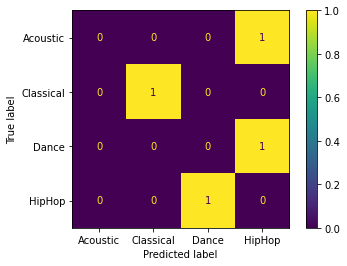

In [8]:
plt = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)